## **Reconocimiento facial - Multiprocesos**

Realizaremos multiprocesamientos básicos con Python. Las respectivas tareas es el de "obtener fotogramas de video y realizar reconocimiento facial de personas". Los archivos como los videos estan ubicadas en una cuenta de Google Drive.

## **PASOS**

## **Paso 1**

Dar acceso, para poder ingresar a nuestra cuenta de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Paso 2**

En este paso vamos a importar, aquellas librerías necesarias para poder manipular los videos y los multiprocesamientos

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os 
import concurrent.futures
import time
import glob

In [ ]:
#La siguiente función nos muestra un aimagen con un cuadro en cada rostro que se lográ ver en los videos
#Como argumentos obtenemos:
#image_path --> es el Path de la imagen
#analysis --> trata de la información de la imagen lograda desde Microsoft Azure

def show_image_with_square(image_path, analysis):

  img = cv2.imread(image_path)
  im2Display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imTemp = im2Display.copy()
  
  faces = []
  for face in analysis:
    fr = face['faceRectangle']
    faces.append(fr)
    top = fr['top']
    left = fr['left']
    width = fr['width']
    height = fr['height']
    print(top, left, width, height)
    pt1 = (left, top )
    pt2 = (left+width, top+height)
    
    color = (23,200,54)
    thickness = 10
    cv2.rectangle(imTemp, pt1, pt2, color, thickness)
  plt.imshow(imTemp)
  plt.show()

In [ ]:
!pip install dlib
!pip install cognitive_face 
import cognitive_face as CF

KEY = '37bbb85a81f44df6aa69a50f3fe58b8b'  # Replace with a valid Subscription Key here.
CF.Key.set(KEY)

BASE_URL = 'https://prueva1.cognitiveservices.azure.com/face/v1.0/'  # Replace with your regional Base URL
CF.BaseUrl.set(BASE_URL)
#print(BASE_URL)

img_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
result = CF.face.detect(img_url)
print(result)

[{'faceId': 'f80d9aea-2a01-4a2b-9f2b-7ceb1b378868', 'faceRectangle': {'top': 124, 'left': 459, 'width': 227, 'height': 227}}]


In [ ]:
!pip install dlib
!pip install cognitive_face 
import sys
import requests
import json

import cognitive_face as CF
from PIL import Image, ImageDraw, ImageFont

SUBSCRIPTION_KEY = '37bbb85a81f44df6aa69a50f3fe58b8b'  #En este espació se coloca el "key" que genera nuestro API, en Microsoft Azure
BASE_URL = 'https://prueva1.cognitiveservices.azure.com/face/v1.0/'  #Aquí se coloca la dirección de nuestro API creada en Microsoft Azure 
CF.BaseUrl.set(BASE_URL)
CF.Key.set(SUBSCRIPTION_KEY)

## **Paso 3**

Aquí se aplica el de obtener cada información de una persona en una foto

In [ ]:
#La función se encarga obtener la información de cada persona en una respectiva foto
#Tenemos como argumentos:
#picture --> el Path de la imagen
#return --> nos retorna la información de las personas en una foto

def emotions(picture):
 
  image_path = picture
  #Seguidamente, es leer una imagen en una matriz de bytes
  image_data = open(image_path, "rb").read()
  headers = {'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY,
  'Content-Type': 'application/octet-stream'}
  params = {
      'returnFaceId': 'true',
      'returnFaceLandmarks': 'false',
      'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
  }
  response = requests.post(
                            BASE_URL + "detect/", headers=headers, params=params, data=image_data)
  analysis = response.json()
  return analysis

  


In [ ]:
#Está función nos da a mostrar una imagen
#Como argumentos tenemos:
#image_path --> el Path de la imagen

def show_image(image_path):
  
  img = cv2.imread(image_path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_cvt)
  plt.show()


## **Paso 4**

En esta línea de código se realiza la lectura del video y se gurdan los fotogramas con los rasgos faciales de las personas - Modo secuencial

[{'faceId': '34bfd6e3-3cdd-4127-b660-25cce718af5c', 'faceRectangle': {'top': 69, 'left': 351, 'width': 81, 'height': 81}, 'faceAttributes': {'smile': 0.64, 'headPose': {'pitch': 2.7, 'roll': -9.6, 'yaw': 0.4}, 'gender': 'male', 'age': 33.0, 'facialHair': {'moustache': 0.6, 'beard': 0.6, 'sideburns': 0.6}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.111, 'contempt': 0.003, 'disgust': 0.006, 'fear': 0.015, 'happiness': 0.64, 'neutral': 0.2, 'sadness': 0.016, 'surprise': 0.009}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.62}, 'noise': {'noiseLevel': 'low', 'value': 0.21}, 'makeup': {'eyeMakeup': True, 'lipMakeup': False}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.97, 'invisible': False, 'hairColor': []}}}, {'faceId': '494acfdb-67f9-4a22-803d-94dfab11271a', 'faceRectangle': {'top': 300, 'left': 369, 'width': 70, 'height': 70}, 'faceAttributes': {'

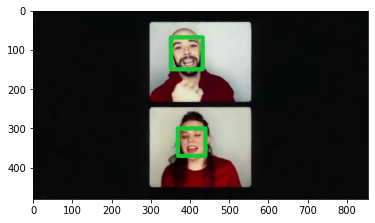

Duration: 18.739343078000047


In [ ]:
import cv2
 
# Esta línea se encarga de abrir nuestro archivo de video
video= cv2.VideoCapture('/content/drive/MyDrive/Arquitectura/jesse_joy_love_es_nuestro_idioma_video_oficial_h264_81150.mp4')

i=0
j = 4450

start = time.perf_counter()  #INICIA EL TIEMPO QUE REALIZA LA TAREA

while(video.isOpened()):  #nos abre el video 
    ret, frame = video.read() #se encarga de obtener cada fotograma del video

    if ret == False:  #si no obtiene ningún fotograma se termina el ciclo
        break

    if i == j:    
      cv2.imwrite('/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg',frame) #en esta dirección se guardará el fotograma con su respectivo nombre, más el número del contador i
      j +=4000
      image_path = '/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg'
      analysis = emotions(image_path)
      print(analysis)
      show_image_with_square(image_path, analysis)
    i+=1

print(f'Duration: {time.perf_counter() - start}') #NOS IMPRIME EL TIEMPO QUE SE HA TOMADO EN REALIZAR EL RECONOCIMIENTO FACIAL

video.release()


## **Paso 5**

En esta celda de código se realiza la lectura del video y se gurdan los fotogramas con los rasgos faciales de las personas - Modo multiprocesamiento (ProcessPoolExecutor): se utiliza el módulo **concurrent.futures** para procesar las tareas a la misma vez

[{'faceId': '3527338b-4443-42bd-ba98-53b8a642bee1', 'faceRectangle': {'top': 69, 'left': 385, 'width': 121, 'height': 121}, 'faceAttributes': {'smile': 0.001, 'headPose': {'pitch': 9.4, 'roll': 2.1, 'yaw': 20.9}, 'gender': 'male', 'age': 27.0, 'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.001, 'fear': 0.0, 'happiness': 0.001, 'neutral': 0.049, 'sadness': 0.948, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.38}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': False, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.57, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 0.92}, {'color': 'blond', 'confidence': 0.84}, {'color': 'black', 'confidence': 0.8}, {'color': 'gray', 'confidence': 

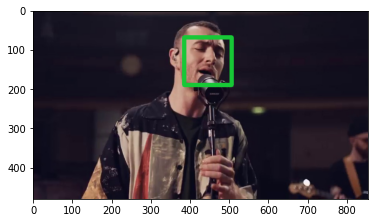

Duration: 13.803614528000026


In [ ]:
import cv2
 
#Esta línea se encarga de abrir nuestro archivo de video
video= cv2.VideoCapture('/content/drive/MyDrive/Arquitectura/sam_smith_too_good_at_goodbyes_live_from_hackney_round_chapel_h264_3892.mp4')

i=0
j = 4450

start = time.perf_counter()  #INICIA EL TIEMPO QUE REALIZA LA TAREA

with concurrent.futures.ProcessPoolExecutor() as executor:
  
  while(video.isOpened()):   #nos abre el video 
    ret, frame = video.read() #se encarga de obtener cada fotograma del video 

    if ret == False:  #si no obtiene ningún fotograma se termina el ciclo
        break

    if i == j:     
      cv2.imwrite('/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg',frame) #en esta dirección se guardará el fotograma con su respectivo nombre, más el número del contador i
      image_path = '/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg'
      analysis = emotions(image_path)
      print(analysis)
      show_image_with_square(image_path, analysis)
    i+=1

print(f'Duration: {time.perf_counter() - start}') #NOS IMPRIME EL TIEMPO QUE SE HA TOMADO EN REALIZAR EL RECONOCIMIENTO FACIAL

video.release()


## **Paso 6**

En esta línea de código se realiza la lectura del video y se gurdan los fotogramas con los rasgos faciales de las personas - Modo multiprocesamientos (ThreadPoolExecutor): se utiliza el **multithreading**. Este se encarga de ejecutar solo una tarea como un solo subproceso o hilos dentro del proceso principal

[{'faceId': 'f913c306-aeec-4406-b1c1-cd9d449deeb8', 'faceRectangle': {'top': 18, 'left': 51, 'width': 257, 'height': 257}, 'faceAttributes': {'smile': 0.0, 'headPose': {'pitch': 6.6, 'roll': 12.1, 'yaw': 6.4}, 'gender': 'female', 'age': 30.0, 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 1.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'medium', 'value': 0.45}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.32}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': True, 'lipMakeup': True}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.13, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 1.0}, {'color': 'red', 'confidence': 0.46}, {'color': 'black', 'confidence': 0.37}, {'color': 'blond', 'confidence': 0.24}, 

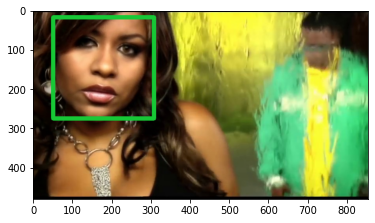

Duration: 17.382155752000017


In [ ]:
import cv2
 
#Esta línea se encarga de abrir nuestro archivo de video
video= cv2.VideoCapture('/content/drive/MyDrive/Arquitectura/la_factoria_perdoname_ft._eddy_lover_h264_4131.mp4')

i=0
j = 4450

start = time.perf_counter()  #INICIA EL TIEMPO QUE REALIZA LA TAREA

with concurrent.futures.ThreadPoolExecutor() as executor:
  
  while(video.isOpened()):   #nos abre el video 
    ret, frame = video.read() #se encarga de obtener cada fotograma del video 

    if ret == False:  #si no obtiene ningún fotograma se termina el ciclo
        break

    if i == j:     
      cv2.imwrite('/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg',frame) #se guarda el fotograma con el nombre más el número del contador i#en esta dirección se guardará el fotograma con su respectivo nombre, más el número del contador i
      j +=4000
      image_path = '/content/drive/MyDrive/Resultado'+ 'nombre'+str(i)+'.jpg'
      analysis = emotions(image_path)
      print(analysis)
      show_image_with_square(image_path, analysis)
    i+=1

print(f'Duration: {time.perf_counter() - start}') #NOS IMPRIME EL TIEMPO QUE SE HA TOMADO EN REALIZAR EL RECONOCIMIENTO FACIAL

video.release()


## **Utilitario**

Es opcional, su trabajo es el de eliminar los archivos de la carpeta donde se guardan los resultados o fotogramas

In [ ]:
faceList = glob.glob(resultFolder + "/*.*")

#todos mis archivos comienzan con "marco" y terminan con ".jpg

print("Number of faces: ", len(faceList))

for facePath in faceList:
  try:
    os.remove(facePath)
  except:
    print("Error while deleting face : ", facePath)